In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data preperation

In [56]:
X = pd.read_csv('E:\dev\Data science\Data-science-master\Linear regression\Training Data\Linear_X_Train.csv')
Y = pd.read_csv('E:\dev\Data science\Data-science-master\Linear regression\Training Data\Linear_Y_Train.csv')

In [57]:
X.head()
X.shape

(3750, 1)

In [58]:
Y.head()
Y.shape

(3750, 1)

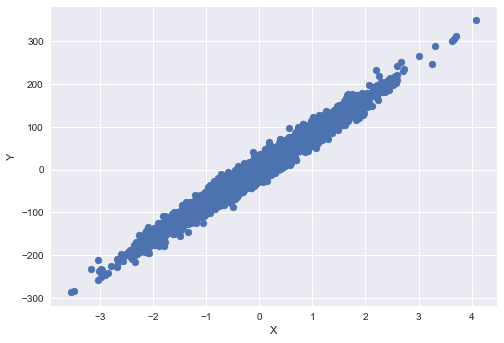

In [59]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [60]:
type(X)

pandas.core.frame.DataFrame

In [61]:
x=X.values
y=Y.values

In [62]:
##Normalization

u=x.mean()
sd=x.std()

x = (x-u)/sd

### Linear regression implementation

In [63]:
def hypothesis(x,theta):
    # theta=[theta0,theta1]
    y_ = theta[0]+theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        y_=hypothesis(X[i],theta)
        y = Y[i]
        
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*X[i]
        
    return grad/m

def error(X,Y,theta):
    m = x.shape[0]
    totalerr=0.0
    for i in range (m):
        y_=hypothesis(X[i],theta)
        totalerr+=(y_ - Y[i])**2
        
    return totalerr/m

def gradientDescent(X,Y,maxsteps=100,learning_rate=0.1):
    
    theta = np.zeros((2,))
    errorlist=[]
    for i in range (maxsteps):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        errorlist.append(e)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta,errorlist

In [64]:
theta,error_list = gradientDescent(x,y)

In [65]:
theta

array([ 0.6838508 , 79.90361453])

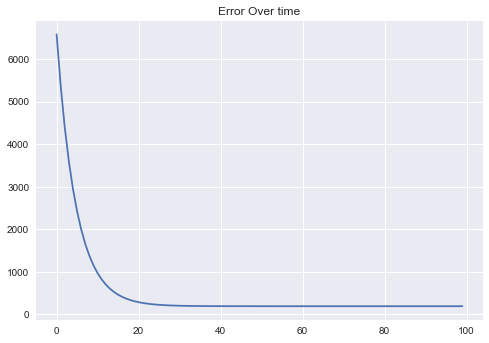

In [66]:
plt.plot(error_list)
plt.title('Error Over time')
plt.show()

### Predictions and Best line

In [67]:
 y_ = hypothesis(x,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


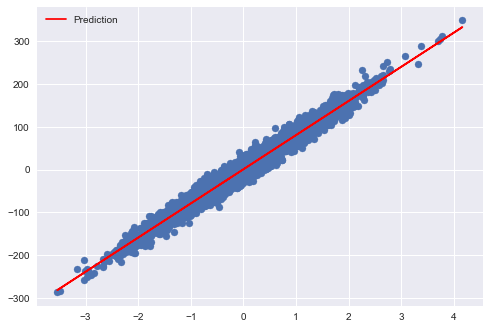

In [68]:
plt.scatter(x,y)
plt.plot(x,y_,color='red',label='Prediction')
plt.legend()
plt.show()

In [69]:
xtest=pd.read_csv('E:\dev\Data science\Data-science-master\Linear regression\Test Cases\Linear_X_Test.csv')

In [70]:
y_test=hypothesis(xtest,theta)
y_test.shape

(1250, 1)

In [71]:
y_test.head()

,x
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897


In [72]:
df = pd.DataFrame(data=y_test,columns=['y'])
df.to_csv('y_prediction.csv',index=False)